In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from mpl_toolkits.basemap import Basemap
#import mpl_toolkits
#mpl_toolkits.__path__.append('/home/rahulaedula95/anaconda3/envs/my_env/lib/python3.6/site-packages/mpl_toolkits/')
#import cartopy.crs as ccrs

In [2]:
global_data = pd.read_csv('data/global.csv',index_col='FID')
global_data

,thermo_tecto_age,thickness_upper_crust,thickness_middle_crust,upper_mantle_density_anomaly,d_2_ridge,d_2_trench,d_2_trans_ridge,d_2_volcano,d_2_hotspot,heat_prod_provinces,...,lat,GHF,upper_mantle_vel_structure,rock_type,age,magnetic_anomaly,depth_to_moho,lithos_asthenos_bdry,bougeur_gravity_anomaly,topography
FID,,,,,,,,,,,,,,,,,,,,,
0,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,1.98,...,75.500122,54.000000,2.0,3.0,2.297060,-1.698360,-42.095402,219571.00000,110.143997,76.226402
1,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,1.98,...,75.500122,57.500000,2.0,3.0,2.277860,-13.700700,-42.294998,237790.00000,114.978996,71.403198
2,1.0,13.000,13.000,0.0383,2056.02,2063.41,3853.50,1708.09,30.438463,1.98,...,74.500122,56.000000,2.0,3.0,2.282202,17.431999,-26.982100,245314.00000,119.232002,-151.248001
3,1.0,13.000,12.000,0.0343,1872.02,2567.14,4110.06,2071.42,34.677082,1.98,...,74.500122,118.167000,2.0,3.0,2.118015,-64.813202,-30.231199,183278.00000,123.305000,-74.843300
4,1.0,10.000,9.500,0.0059,2057.43,1913.82,3817.14,1585.16,25.700195,1.01,...,74.500122,46.530899,2.0,3.0,2.740498,10.648300,-31.743000,242293.00000,114.766998,139.421997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,1.0,8.500,8.502,-0.0727,1484.39,4639.52,1754.06,226.68,5.522680,2.32,...,-46.500000,75.269200,3.0,3.0,1.897233,-74.271202,-36.190201,69162.79688,89.410698,857.000000
4032,1.0,8.000,7.998,-0.0756,1469.81,4624.86,1753.49,216.77,4.527693,2.32,...,-46.500000,75.130800,3.0,1.0,1.869254,-25.160299,-32.507702,69681.39844,68.540298,985.000000
4033,1.0,8.000,7.998,-0.0728,1455.81,4609.94,1753.66,210.30,3.535534,2.32,...,-46.500000,75.089500,6.0,1.0,1.847295,-44.879601,-29.178200,65409.19922,134.682007,294.000000


In [3]:
X = global_data.drop(['GHF'],axis=1)
y = global_data['GHF']


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=11)



clf = LinearRegression()

clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))


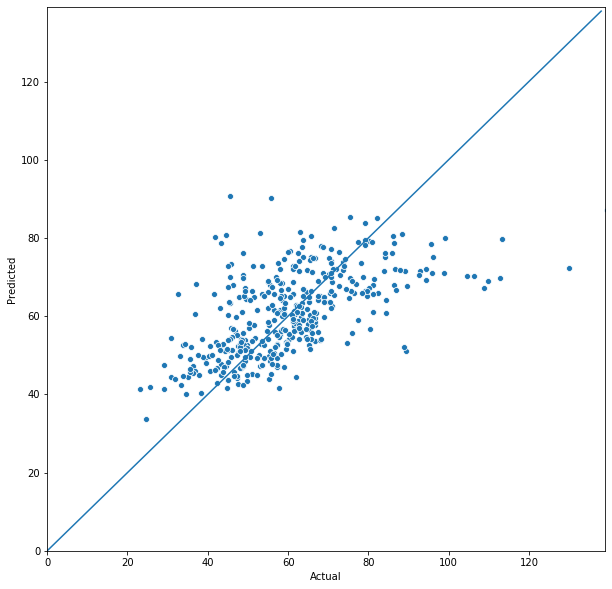

In [5]:
plotter  = pd.DataFrame()
plotter['Actual'] = y_test
plotter['Predicted'] = y_pred
plt.figure(figsize=(10, 10))
plt.xlim(0,max(int(max(y_test)),int(max(y_pred))))
plt.ylim(0,max(int(max(y_test)),int(max(y_pred))))
sns.scatterplot(x='Actual',y='Predicted',data=plotter)
sns.lineplot(x=range(0,max(int(max(y_test)),int(max(y_pred)))),y = range(0,max(int(max(y_test)),int(max(y_pred)))))


/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


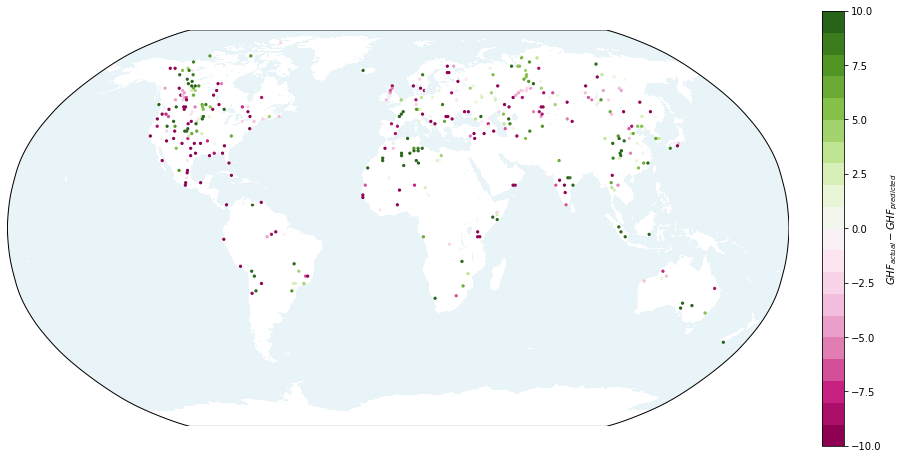

In [6]:
lat = X_test['lat'].values
lon = X_test['lon'].values
fig = plt.figure(figsize=(15, 15))
center = (28.67, 45.5)
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawlsmask(land_color = "#ffffff",
               ocean_color="#e8f4f8",
               resolution = 'l')

diff_cmap = plt.get_cmap('PiYG', 20)
scatter_args = {'marker': 'o', 's': 15, 'lw': 0.25, 'edgecolor':'black','cmap': diff_cmap}
x,y = m(X_test.lon.as_matrix(), X_test.lat.as_matrix())
m.scatter(x,y,marker='o', s=5, c=y_test-y_pred, cmap=diff_cmap)
plt.colorbar(label=r'$GHF_{actual} - GHF_{predicted}$', fraction=0.026, pad=0.04)
plt.clim(-10, 10)


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(loss='ls',learning_rate=0.05,n_estimators=1000,subsample=1,max_depth=4,max_features=0.3,verbose=0)

clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))


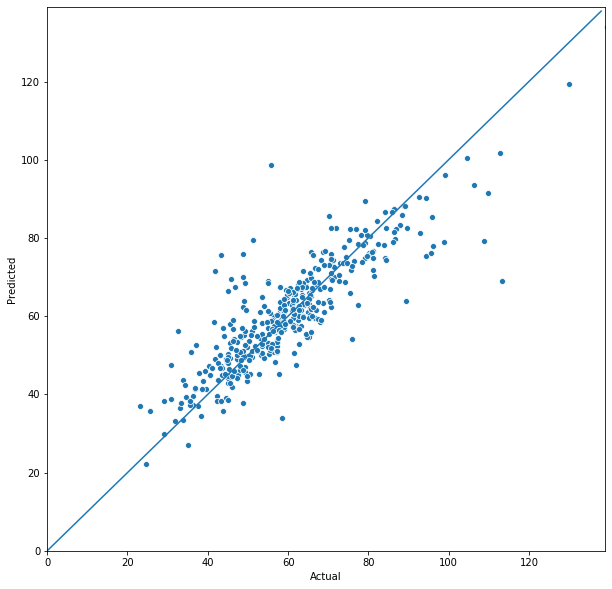

In [8]:
plotter  = pd.DataFrame()
plotter['Actual'] = y_test
plotter['Predicted'] = y_pred
plt.figure(figsize=(10, 10))
plt.xlim(0,max(int(max(y_test)),int(max(y_pred))))
plt.ylim(0,max(int(max(y_test)),int(max(y_pred))))
sns.scatterplot(x='Actual',y='Predicted',data=plotter)
sns.lineplot(x=range(0,max(int(max(y_test)),int(max(y_pred)))),y = range(0,max(int(max(y_test)),int(max(y_pred)))))


/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/rahulaedula95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


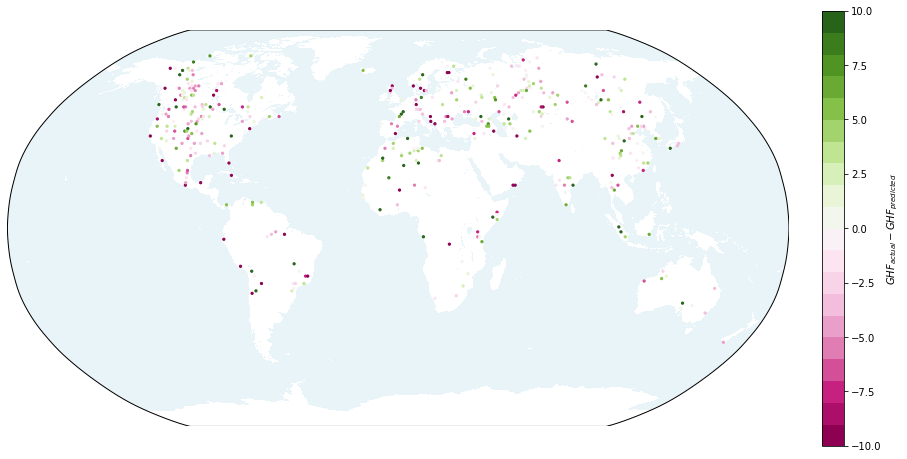

In [9]:
lat = X_test['lat'].values
lon = X_test['lon'].values
fig = plt.figure(figsize=(15, 15))
center = (28.67, 45.5)
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawlsmask(land_color = "#ffffff",
               ocean_color="#e8f4f8",
               resolution = 'l')

diff_cmap = plt.get_cmap('PiYG', 20)
scatter_args = {'marker': 'o', 's': 15, 'lw': 0.25, 'edgecolor':'black','cmap': diff_cmap}
x,y = m(X_test.lon.as_matrix(), X_test.lat.as_matrix())
m.scatter(x,y,marker='o', s=5, c=y_test-y_pred, cmap=diff_cmap)
plt.colorbar(label=r'$GHF_{actual} - GHF_{predicted}$', fraction=0.026, pad=0.04)
plt.clim(-10, 10)


In [ ]:
def split_by_distance(data, center, radius):
    """ Returns a pair of data frames, one containing rows in data that are
        closer than radius to center, and the other containing those that are
        not.
        Args:
            data (pandas.DataFrame): the entire data set.
        Return:
            (within, beyond):
                two data frames resulting from partitioning the data set to
                within ROI and beyond ROI.
    """
    # store distances in a temporary column '_distance'
    data['_distance'] = haversine_distances(data, center)
    within = data[data._distance < radius].drop('_distance', axis=1)
    beyond = data[data._distance > radius].drop('_distance', axis=1)
    data.drop('_distance', axis=1, inplace=True)

    return within, beyond
